# Average Filter (Box Filter)

**Initialization**

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
    
import lib.pgm as libpgm
import lib.conv as libconv
import lib.smooth as libsmooth
import lib.norm as libnorm
import lib.helpers as libhelpers

**Read PGM**

In [2]:
pgm_path = '../assets/pgms/lena.ascii.pgm';
pgm = libpgm.read(pgm_path)

**Helper Functions**

In [3]:
def apply_standard_average_filter(image, size):
    kernel = libsmooth.create_average_kernel(size)
    return libconv.convolve2d(image, kernel);
    
def apply_weighted_average_filter(image):
    kernel = [
        [1/16, 2/16, 1/16],
        [2/16, 4/16, 2/16],
        [1/16, 2/16, 1/16]
    ]
    return libconv.convolve2d(image, kernel);

## Apply Standard Average Filter

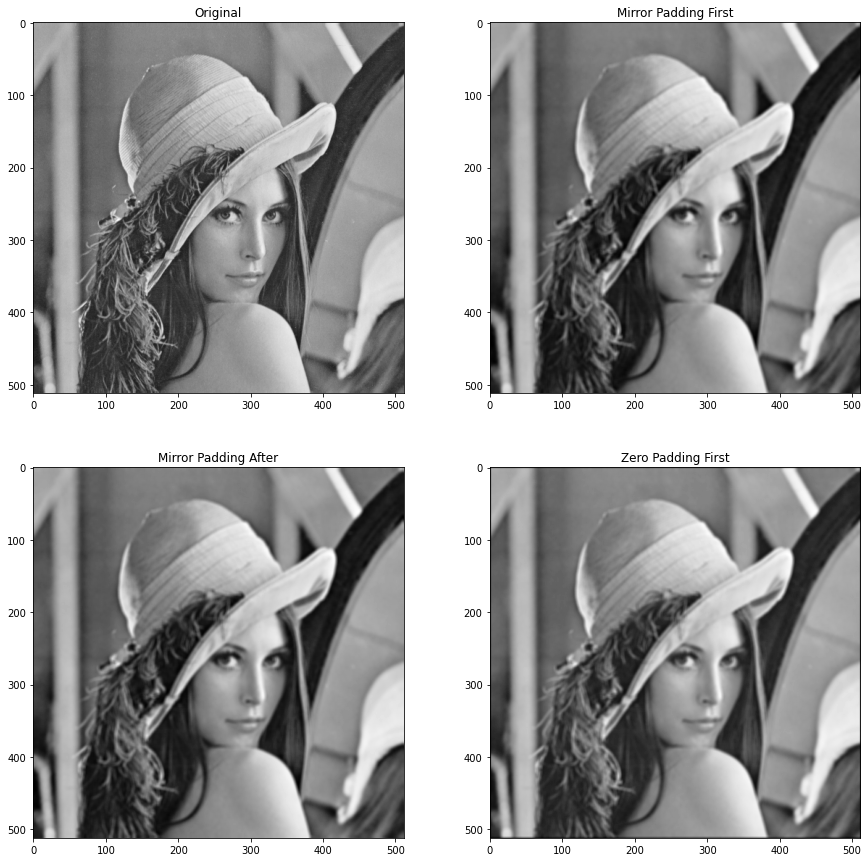

In [4]:
kernel_size = 5
kernel_padding = int((kernel_size - 1) / 2)

plt.figure(figsize=(15, 15), dpi=72)
plt.subplot(2, 2, 1)
plt.gca().set_title('Original')
libpgm.show(pgm)  

# 1
image = libhelpers.pgm_to_image(pgm)
libconv.apply_padding(image, libconv.pad_mirror, kernel_padding)
image = apply_standard_average_filter(image, kernel_size)
image = libnorm.apply_minmax_nd(image)

plt.subplot(2, 2, 2)
plt.gca().set_title('Mirror Padding First')
libhelpers.show_image(image)

# 2
image = libhelpers.pgm_to_image(pgm)
image = apply_standard_average_filter(image, kernel_size)
libconv.apply_padding(image, libconv.pad_mirror, kernel_padding)
image = libnorm.apply_minmax_nd(image)

plt.subplot(2, 2, 3)
plt.gca().set_title('Mirror Padding After')
libhelpers.show_image(image)

# 3
image = libhelpers.pgm_to_image(pgm)
libconv.apply_padding(image, libconv.pad_zero, kernel_padding)
image = apply_standard_average_filter(image, kernel_size)
image = libnorm.apply_minmax_nd(image)

plt.subplot(2, 2, 4)
plt.gca().set_title('Zero Padding First')
libhelpers.show_image(image)

## Apply Weighted Average Filter

In [ ]:
kernel_size = 3
kernel_padding = int((kernel_size - 1) / 2)

plt.figure(figsize=(15, 15), dpi=72)
plt.subplot(2, 2, 1)
plt.gca().set_title('Original')
libpgm.show(pgm)  

# 1
image = libhelpers.pgm_to_image(pgm)
libconv.apply_padding(image, libconv.pad_mirror, kernel_padding)
image = apply_weighted_average_filter(image)
image = libnorm.apply_minmax_nd(image)

plt.subplot(2, 2, 2)
plt.gca().set_title('Mirror Padding First')
libhelpers.show_image(image)

# 2
image = libhelpers.pgm_to_image(pgm)
image = apply_weighted_average_filter(image)
libconv.apply_padding(image, libconv.pad_mirror, kernel_padding)
libhelpers.image = libnorm.apply_minmax_nd(image)

plt.subplot(2, 2, 3)
plt.gca().set_title('Mirror Padding After')
libhelpers.show_image(image)

# 3
image = libhelpers.pgm_to_image(pgm)
libconv.apply_padding(image, libconv.pad_zero, kernel_padding)
image = apply_weighted_average_filter(image)
image = libnorm.apply_minmax_nd(image)

plt.subplot(2, 2, 4)
plt.gca().set_title('Zero Padding First')
libhelpers.show_image(image)